# Задача

**Требуется:** обучить классификатор для определения чистых и грязных тарелок.  
  
**Вход:** фотография 224x224x3.  
**Выход:** мeтка: 0-cleaned, 1-dirty.

**Метрика:** Accuracy.  
    
Доступные данные разделены на несколько папок:  
- `train` 40 фотографий.
- `test` 744 фотографий.  
  

## Split train/validation

In [ ]:
import os
import shutil 
from tqdm import tqdm
from config import TRAIN_DIR, VAL_DIR

data_root = 'data'
class_names = ['cleaned', 'dirty']

for dir_name in [TRAIN_DIR, VAL_DIR]:
    for class_name in class_names:
        os.makedirs(os.path.join(dir_name, class_name), exist_ok=True)

for class_name in class_names:
    source_dir = os.path.join(data_root, 'train', class_name)
    for i, file_name in enumerate(tqdm(os.listdir(source_dir))):
        if i % 6 != 0:
            dest_dir = os.path.join(TRAIN_DIR, class_name) 
        else:
            dest_dir = os.path.join(VAL_DIR, class_name)
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

## Show images

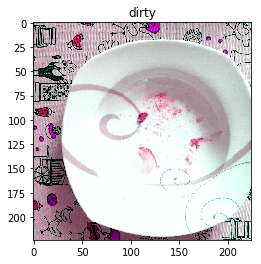

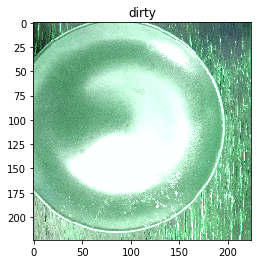

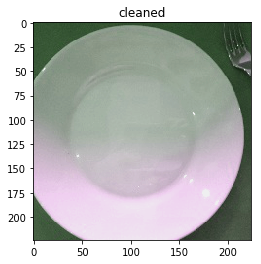

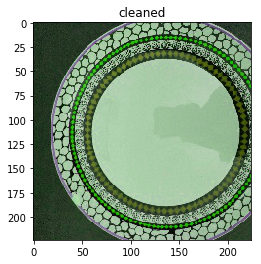

In [8]:
import matplotlib.pyplot as plt
from data_loader import train_dataloader

def show_input(input_tensor, title=''):
    image = input_tensor.permute(1, 2, 0).numpy()
    image = std * image + mean
    plt.imshow(image.clip(0, 1))
    plt.title(title)
    plt.show()
    plt.pause(0.001)

X_batch, y_batch = next(iter(train_dataloader))

for x_item, y_item in zip(X_batch, y_batch):
    show_input(x_item, title=class_names[y_item])

## Pretrained model

In [ ]:
import torch 
from torchvision import models
from config import NUM_CLASSES

model = models.resnet50(pretrained=True)

# Disable grad for all conv layers
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(
    torch.nn.Linear(model.fc.in_features, 256), torch.nn.ReLU(), torch.nn.Dropout(0.4),
    torch.nn.Linear(256, NUM_CLASSES))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Train model

In [ ]:
from train import train_model
model, history = train_model(model, loss, optimizer, scheduler, NUM_EPOCHS);

In [ ]:
train_loss_history, train_acc_history, val_loss_history, val_acc_history = history

## Plot losses and metrics

Text(0.5, 1.0, 'Training and Validation Losses')

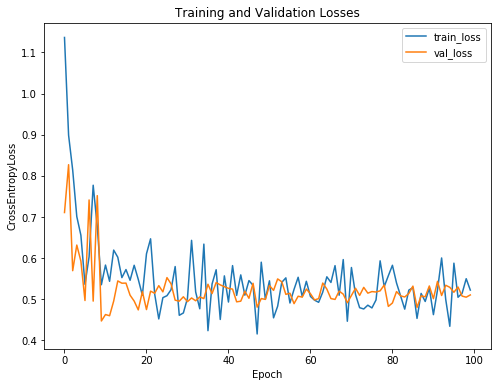

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(train_loss_history, label='train_loss')
plt.plot(val_loss_history, label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('CrossEntropyLoss')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Losses')

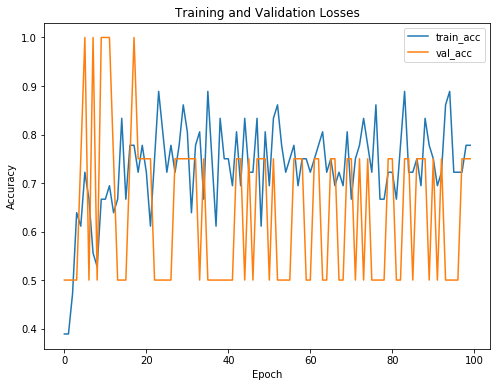

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(train_acc_history, label='train_acc')
plt.plot(val_acc_history, label='val_acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Losses')

## Predict probability 

In [ ]:
from predict import predict_proba
test_predictions = predict_proba(model)

## Show predictions and images

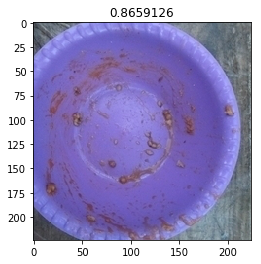

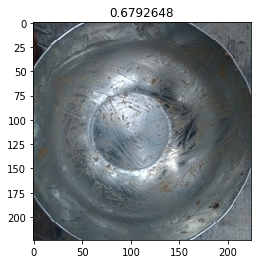

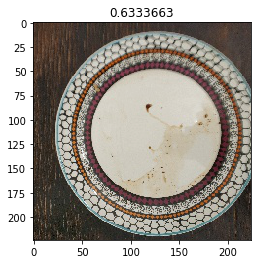

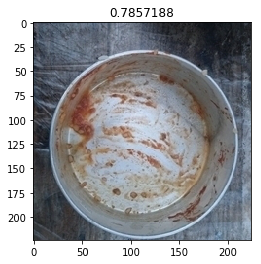

In [17]:
from data_loader import test_dataloader
inputs, labels, paths = next(iter(test_dataloader))

for img, pred in zip(inputs, test_predictions):
    show_input(img, title=pred)

## Submit

In [ ]:
from make_submission import submit
submission = submit(test_img_paths, test_predictions)